In [1]:
import os
import numpy as np
import pprint
from fastestimator.summary.logs import parse_log_file
import matplotlib.pyplot as plt

/home/yunchan/anaconda3/envs/tf2.3/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


# Plot the box plot of failure mode

In [5]:
def plot_failure_mode(ylim=None): 
    task = "instance_detection"
    init_lr = "0.01"
    metric = "mAP"
    func = np.max
        
    result = {}
    result[init_lr] = []
    if init_lr == "1.0":
        init_lr_fix = "1"
    else:
        init_lr_fix = init_lr.replace(".", "")

    # normal 
    for scheduler in ["base-lr",
                      "cosine-decay",
                      "cyclic-cosine-decay",
                      "exponential-decay",
                      "lr-controller-weighted-acc"]:
        stat = []
        for run in range(5):
            summary = parse_log_file(f"../../../logs/normal_comparison/{task}/{init_lr_fix}_{scheduler}_{run}.txt", ".txt")
            best = func([x for x in summary.history["eval"][metric].values()])
            stat.append(best)
        result[init_lr].append(stat)
            
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    bplot1 = axs.boxplot(
        result[init_lr],
        vert=True,  # vertical box aligmnent
        patch_artist=True)  # fill with color

    # adding horizontal grid lines
    axs.yaxis.grid(True)
    axs.set_xticks([y+1 for y in range(5)])
    axs.set_xticklabels(["BLR", "CD", "CCD", "ED", "ARC"])
    plt.savefig("../../../results/supplementary/failure_mode_ID_lr001.jpeg", dpi=300, transparent=True)

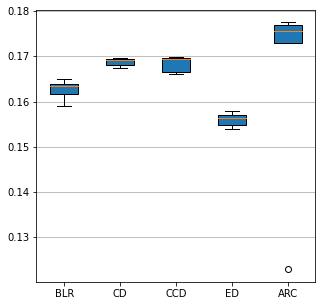

In [6]:
plot_failure_mode()